<h1 style="background: linear-gradient(45deg, #FF6B6B, #4ECDC4);
         -webkit-background-clip: text;
         -webkit-text-fill-color: transparent;
         font-family: 'Arial', sans-serif;
         font-size: 48px;
         text-align: center;
         padding: 20px;
         transition: all 0.3s ease;"
        onmouseover="this.style.transform='scale(1.5)'"
        onmouseout="this.style.transform='scale(1)'">
         <b>Cluster Analysis</b></h1>

<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #FF6B6B, #4ECDC4); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(78, 205, 196, 0.4); display: inline-block; border: 2px solid rgba(255, 255, 255, 0.2);">
    <h1 style="color: #ffffff; text-align: center; font-size: 24px; letter-spacing: 2px; text-transform: uppercase; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.2); white-space: nowrap;">
        Importing Libraries
    </h1>
</div>


In [338]:
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from matplotlib import  pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline

<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #9D50BB, #6E48AA); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(157, 80, 187, 0.4); display: inline-block; border: 2px solid rgba(255, 255, 255, 0.2);">
    <h1 style="color: #ffffff; text-align: center; font-size: 24px; letter-spacing: 2px; text-transform: uppercase; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.2); white-space: nowrap;">
        Loading Data
    </h1>
</div>


In [339]:
df=pd.read_csv('Social_Media_Usage_Dataset.csv')
df.head()

,Timestamp,Age,Gender,"Major (Computer Science, Business, Engineering, etc.)",Hours Spent on Social Media per Day (Average),Primary Social Media Platform.,Frequency of Posting in social media,Number of Friends or Followers in social media,"Academic Performance: (categorical: Good, Average, Poor)."
0,2024-01-01 00:00:00,24,Male,Engineering,0.7,Snapchat,Sometimes,1629,Average
1,2024-01-01 01:00:00,32,Other,Biology,2.9,LinkedIn,Often,387,Average
2,2024-01-01 02:00:00,28,Female,Computer Science,4.2,Facebook,Very Often,6032,Good
3,2024-01-01 03:00:00,25,Other,Biology,6.3,Snapchat,Often,6440,Average
4,2024-01-01 04:00:00,24,Male,Computer Science,5.6,LinkedIn,Rarely,6402,Good


In [340]:
df.columns

Index(['Timestamp', 'Age', ' Gender  ',
       ' Major (Computer Science, Business, Engineering, etc.)   ',
       ' Hours Spent on Social Media per Day (Average)',
       ' Primary Social Media Platform.',
       ' Frequency of Posting in social media ',
       'Number of Friends  or Followers in social media',
       ' Academic Performance: (categorical: Good, Average, Poor).   '],
      dtype='object')

<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #FC466B, #3F5EFB); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(252, 70, 107, 0.4); display: inline-block; border: 2px solid rgba(255, 255, 255, 0.2); animation: shimmer 3s ease-in-out infinite;">
    <h1 style="color: #ffffff; text-align: center; font-size: 24px; letter-spacing: 2px; text-transform: uppercase; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.2); white-space: nowrap;">
        Data Renaming
    </h1>
</div>

<style>
@keyframes shimmer {
    0% { background-position: 0% 50%; }
    50% { background-position: 100% 50%; }
    100% { background-position: 0% 50%; }
}
</style>


In [341]:
df.rename(columns={
    'Timestamp': 'Timestamp',
    'Age': 'Age',
    ' Gender  ': 'Gender',
    ' Major (Computer Science, Business, Engineering, etc.)   ': 'Major',
    ' Hours Spent on Social Media per Day (Average)': 'Hours_Spent',
    ' Primary Social Media Platform.': 'Primary_Platform',
    ' Frequency of Posting in social media ': 'Freq_Post',
    'Number of Friends  or Followers in social media': 'Num_Friends',
    ' Academic Performance: (categorical: Good, Average, Poor).   ': 'Acad_Perf'
}, inplace=True)
df.head()


,Timestamp,Age,Gender,Major,Hours_Spent,Primary_Platform,Freq_Post,Num_Friends,Acad_Perf
0,2024-01-01 00:00:00,24,Male,Engineering,0.7,Snapchat,Sometimes,1629,Average
1,2024-01-01 01:00:00,32,Other,Biology,2.9,LinkedIn,Often,387,Average
2,2024-01-01 02:00:00,28,Female,Computer Science,4.2,Facebook,Very Often,6032,Good
3,2024-01-01 03:00:00,25,Other,Biology,6.3,Snapchat,Often,6440,Average
4,2024-01-01 04:00:00,24,Male,Computer Science,5.6,LinkedIn,Rarely,6402,Good


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #36D1DC, #5B86E5); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(54, 209, 220, 0.4); display: inline-block; border: 2px solid rgba(255, 255, 255, 0.2); animation: glow 2s ease-in-out infinite;">
    <h1 style="color: #ffffff; text-align: center; font-size: 24px; letter-spacing: 2px; text-transform: uppercase; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.2); white-space: nowrap;">
        Data Cleaning
    </h1>
</div>

<style>
@keyframes glow {
    0% { box-shadow: 0 4px 15px rgba(54, 209, 220, 0.4); }
    50% { box-shadow: 0 4px 20px rgba(91, 134, 229, 0.6); }
    100% { box-shadow: 0 4px 15px rgba(54, 209, 220, 0.4); }
}
</style>


In [342]:
df.drop('Timestamp',axis=1,inplace=True)
df.head()

,Age,Gender,Major,Hours_Spent,Primary_Platform,Freq_Post,Num_Friends,Acad_Perf
0,24,Male,Engineering,0.7,Snapchat,Sometimes,1629,Average
1,32,Other,Biology,2.9,LinkedIn,Often,387,Average
2,28,Female,Computer Science,4.2,Facebook,Very Often,6032,Good
3,25,Other,Biology,6.3,Snapchat,Often,6440,Average
4,24,Male,Computer Science,5.6,LinkedIn,Rarely,6402,Good


<!-- Description Text -->
<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #2C3E50, #3498DB); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(44, 62, 80, 0.4); display: inline-block; max-width: 600px;">
    <p style="color: #ffffff; font-size: 16px; line-height: 1.6; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.2);">
    In this section, we observe that the "Timestamp" column is not essential for our analysis, so we have removed it from our dataset.
    </p>
</div>

<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #FC466B, #3F5EFB); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(252, 70, 107, 0.4); display: inline-block; border: 2px solid rgba(255, 255, 255, 0.2); animation: shimmer 3s ease-in-out infinite;">
    <h1 style="color: #ffffff; text-align: center; font-size: 24px; letter-spacing: 2px; text-transform: uppercase; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.2); white-space: nowrap;">
        DATA PREPROCESSING
    </h1>
</div>

<style>
@keyframes shimmer {
    0% { background-position: 0% 50%; }
    50% { background-position: 100% 50%; }
    100% { background-position: 0% 50%; }
}
</style>


In [343]:
categorical_columns = ['Gender', 'Major', 'Primary_Platform', 'Freq_Post', 'Acad_Perf']

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()


,Age,Gender,Major,Hours_Spent,Primary_Platform,Freq_Post,Num_Friends,Acad_Perf
0,24,1,3,0.7,3,2,1629,0
1,32,2,0,2.9,2,0,387,0
2,28,0,2,4.2,0,3,6032,1
3,25,2,0,6.3,3,0,6440,0
4,24,1,2,5.6,2,1,6402,1


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #0F2027, #203A43, #2C5364); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(15, 32, 39, 0.3); display: block; max-width: 750px; border-left: 5px solid #2C5364; margin: 20px 0;">
    <p style="color: #E8F0F8; font-size: 16px; line-height: 1.8; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.1); letter-spacing: 0.4px;">
        <span style="display: block; font-size: 18px; color: #7FDBFF; margin-bottom: 15px; font-weight: bold; border-bottom: 2px solid rgba(127, 219, 255, 0.3); padding-bottom: 8px;">Process Overview</span>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                Here, we have a list of columns called <span style="color: #FFD700; font-weight: bold;">categorical_columns</span> which contains the names of columns in our DataFrame <span style="color: #FF91AF; font-weight: bold;">df</span> that hold categorical data (like 'Gender', 'Major', etc.).
                <br><br>
                We then create a <span style="color: #98FF98; font-weight: bold;">LabelEncoder</span> object, which is a tool used to convert categorical values into numerical ones. Here, we iterate through each column name in <span style="color: #FFD700; font-weight: bold;">categorical_columns</span>.
                <br><br>
                <span style="color: #FFD700; font-weight: bold;">Process Steps:</span>
                <ul style="color: #E8F0F8; margin: 10px 0 10px 20px; padding-left: 15px;">
                    <li style="margin: 8px 0; font-size: 16px;">First, we fit the <span style="color: #98FF98; font-weight: bold;">LabelEncoder</span> to the unique values present in that specific column</li>
                    <li style="margin: 8px 0; font-size: 16px;">This means the encoder learns the mapping between each category (e.g., "Male", "Female") and a unique numerical label (e.g., 0, 1)</li>
                </ul>
            </p>
        </div>
        <p style="font-size: 16px; margin: 0;">
            Here, we have then transformed the original column in the DataFrame by replacing its categorical values with the numerical labels learned by the encoder. We repeat this fitting and transforming process for every column in <span style="color: #FFD700; font-weight: bold;">categorical_columns</span>.
            <br><br>
            Finally, we display the first few rows of the modified DataFrame using <span style="color: #FF91AF; font-weight: bold;">df.head()</span> to show the result of the label encoding.
        </p>
    </p>
</div>


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, orange, pink, yellow); padding: 20px; border-radius: 12px; box-shadow: 0 6px 20px rgba(255, 105, 180, 0.4); display: inline-block; border: 2px solid rgba(255, 255, 255, 0.2); position: relative; overflow: hidden; animation: gradientShift 8s ease infinite;">
    <h1 style="color: white; text-align: center; font-size: 24px; letter-spacing: 3px; text-transform: uppercase; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.2); white-space: nowrap;">
        Feature Scaling <span style="color: gold; font-weight: 300;">with</span> StandardScaler
    </h1>
</div>

<style>
@keyframes gradientShift {
    0% { background-position: 0% 50%; }
    50% { background-position: 100% 50%; }
    100% { background-position: 0% 50%; }
}
</style>


In [344]:
# Initialize the scaler
scaler = StandardScaler()

# Scale all features
scaled_features = scaler.fit_transform(df)

# Convert back to DataFrame with column names preserved
scaled_data = pd.DataFrame(scaled_features, columns=df.columns)

# Display first few rows of scaled data
scaled_data.head()

,Age,Gender,Major,Hours_Spent,Primary_Platform,Freq_Post,Num_Friends,Acad_Perf
0,-0.344961,0.014728,0.796490,-1.641558,0.751059,0.462959,-1.205994,-1.238444
1,1.228407,1.242063,-1.379712,-0.626656,0.026099,-1.317652,-1.649401,-1.238444
2,0.441723,-1.212607,0.071089,-0.026941,-1.423823,1.353265,0.365926,0.000000
3,-0.148290,1.242063,-1.379712,0.941829,0.751059,-1.317652,0.511587,-1.238444
4,-0.344961,0.014728,0.071089,0.618906,0.026099,-0.427347,0.498021,0.000000


<div style="font-size: 20px;font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #0F2027, #203A43, #2C5364); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(15, 32, 39, 0.3); display: block; max-width: 750px; border-left: 5px solid #2C5364; margin: 20px 0;">
    <p style="color: #E8F0F8; font-size: 16px; line-height: 1.8; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.1); letter-spacing: 0.4px;">
        <span style="font-size: 18px;display: block; font-size: 16px; color: #7FDBFF; margin-bottom: 15px; font-weight: bold; border-bottom: 2px solid rgba(127, 219, 255, 0.3); padding-bottom: 8px;">Scaling Process Overview</span>
        <span style="font-size:14px">
        Here, we've scaled the features of our DataFrame <span style="color: #FF91AF; font-weight: bold;">df</span> using <span style="color: #98FF98; font-weight: bold;">StandardScaler</span>.
        <br><br>
        <div style="font-size: 16px;background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <span style="font-size: 16px;font-size: 18px;color: #FFD700; font-weight: bold;">Step 1:</span> Initialize the <span style="color: #98FF98; font-weight: bold;">StandardScaler</span>
            <br><br>
            <span style="font-size: 16px;color: #FFD700; font-weight: bold;">Step 2:</span> Fit the scaler to our data and transform it in one step using <span style="color: #98FF98; font-weight: bold;">fit_transform()</span>
            <br><br>
            <span style="font-size: 16px;color: #FFD700; font-weight: bold;">Result:</span> This scales the data so that each feature has:
            <ul style="font-size: 16px;color: #E8F0F8; margin: 10px 0 10px 20px;">
                <li style="font-size: 16px;margin: 8px 0;">Mean = <span style="color: #7FDBFF;">0</span></li>
                <li style="font-size: 16px;margin: 8px 0;">Standard Deviation = <span style="color: #7FDBFF;">1</span></li>
            </ul>
        </div>
        <p style="font-size: 16px;">
        Here, we convert the resulting scaled array back into a <span style="color: #98FF98; font-weight: bold;">Pandas DataFrame</span>, preserving the original column names from <span style="color: #FF91AF; font-weight: bold;">df</span>.
        <br><br>
        Finally, we display the first few rows of the scaled DataFrame <span style="color: #FF91AF; font-weight: bold;">scaled_data</span> using <span style="color: #98FF98; font-weight: bold;">head()</span>.
    </p>
</div>


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #FC466B, #3F5EFB); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(252, 70, 107, 0.4); display: inline-block; border: 2px solid rgba(255, 255, 255, 0.2); animation: shimmer 3s ease-in-out infinite;">
    <h1 style="color: #ffffff; text-align: center; font-size: 24px; letter-spacing: 2px; text-transform: uppercase; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.2); white-space: nowrap;">
        CLUSTERING
    </h1>
</div>

<style>
@keyframes shimmer {
    0% { background-position: 0% 50%; }
    50% { background-position: 100% 50%; }
    100% { background-position: 0% 50%; }
}
</style>


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #3F2B96, #A8C0FF); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0, 0, 0, 0.2); display: block; max-width: 750px; border-left: 5px solid #A8C0FF; margin: 20px auto;">
    <p style="color: #FFFFFF; font-size: 16px; line-height: 1.8; margin: 0; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1); letter-spacing: 0.4px;">
        <span style="display: block; font-size: 18px; color: #FFC371; margin-bottom: 15px; font-weight: bold; border-bottom: 2px solid rgba(255, 195, 113, 0.3); padding-bottom: 8px;">K-Means Clustering Overview</span>
        <div style="background: rgba(255, 255, 255, 0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                Now that I have scaled the data, I will be performing clustering via <span style="color: #82E3C9; font-weight: bold;">K-Means clustering</span>. This is a partitioning method that aims to partition n observations into k clusters, where each observation belongs to the cluster with the nearest mean (<span style="color: #FFC371; font-weight: bold;">cluster center</span> or <span style="color: #FFC371; font-weight: bold;">centroid</span>), serving as a prototype of the cluster.
            </p>
        </div>
        <span style="display: block; font-size: 18px; color: #FFC371; margin: 20px 0 15px 0; font-weight: bold;">Steps involved in the Clustering</span> 
        <div style="background: rgba(255, 255, 255, 0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                <span style="color: #FFC371; font-weight: bold;">1. Elbow Method to determine the number of clusters:</span>
                <br>
                Here, we will use the <span style="color: #82E3C9; font-weight: bold;">Elbow Method</span> to find the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the "elbow" point.
                <br><br>
                <span style="color: #FFC371; font-weight: bold;">2. Clustering via K-Means:</span>
                <br>
                Here, we will apply the K-Means algorithm using the determined optimal k value to group the data into clusters.
                <br><br>
                <span style="color: #FFC371; font-weight: bold;">3. Examining the clusters:</span>
                <br>
                Here, if the data has a small number of dimensions (e.g., 2 or 3), we can visualize the resulting clusters using a scatter plot. This allows us to visually inspect the separation and distribution of the clusters.
            </p>
        </div>
    </p>
</div>


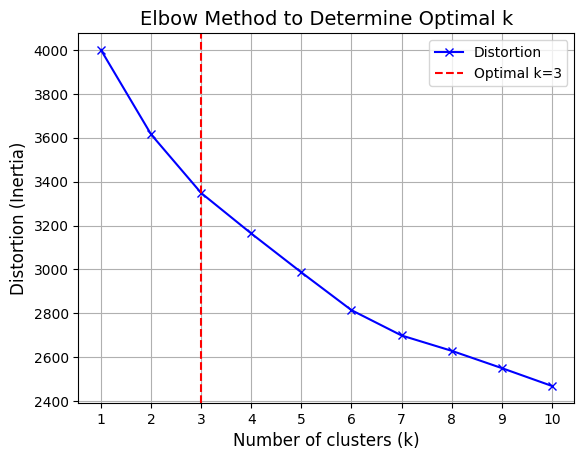

In [345]:
# Calculate distortions for different k values
distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(scaled_data)  # Using scaled data directly instead of PCA_df
    distortions.append(kmeanModel.inertia_)

# Plot elbow curve
plt.plot(K, distortions, 'bx-', label='Distortion')
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Distortion (Inertia)', fontsize=12)
plt.title('Elbow Method to Determine Optimal k', fontsize=14)
plt.grid(True)
plt.xticks(K)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal k=3')
plt.legend()
plt.show()


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #0F2027, #203A43, #2C5364); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(15, 32, 39, 0.3); display: block; max-width: 750px; border-left: 5px solid #2C5364; margin: 20px 0;">
    <p style="color: #E8F0F8; font-size: 16px; line-height: 1.8; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.1); letter-spacing: 0.4px;">
        <span style="display: block; font-size: 18px; color: #7FDBFF; margin-bottom: 15px; font-weight: bold; border-bottom: 2px solid rgba(127, 219, 255, 0.3); padding-bottom: 8px;">Elbow Method Analysis</span>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                The graph shows that as you increase the number of clusters, the <span style="color: #98FF98; font-weight: bold;">distortion</span> decreases. However, the rate of decrease slows down significantly after <span style="color: #FFD700; font-weight: bold;">k = 3</span>.
                <br><br>
                This indicates that <span style="color: #FFD700; font-weight: bold;">3 clusters</span> are sufficient to capture the underlying structure of the data, and adding more clusters beyond that point doesn't provide much additional benefit.
            </p>
        </div>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                <span style="color: #7FDBFF; font-weight: bold;">Conclusion:</span>
                <br>
                The <span style="color: #98FF98; font-weight: bold;">Elbow Method</span> suggests that the optimal number of clusters for this dataset is <span style="color: #FFD700; font-weight: bold;">3</span>. This means that dividing the data into three clusters would provide a good balance between:
                <ul style="color: #E8F0F8; margin: 10px 0 10px 20px; padding-left: 15px;">
                    <li style="margin: 8px 0; font-size: 16px;">Minimizing distortion</li>
                    <li style="margin: 8px 0; font-size: 16px;">Avoiding overfitting (having too many clusters)</li>
                </ul>
            </p>
        </div>
    </p>
</div>


<!-- Description Text -->
<div style="font-family: 'Arial', sans-serif; background: linear-gradient(45deg, #2C3E50, #3498DB); padding: 15px; border-radius: 8px; box-shadow: 0 4px 15px rgba(44, 62, 80, 0.4); display: inline-block; max-width: 600px;">
    <p style="color: #ffffff; font-size: 16px; line-height: 1.6; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.2);">
     Now i have applied K-mean clustering with cluster size 3
    </p>
</div>

In [346]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #0F2027, #203A43, #2C5364); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(15, 32, 39, 0.3); display: block; max-width: 750px; border-left: 5px solid #2C5364; margin: 20px 0;">
    <p style="color: #E8F0F8; font-size: 16px; line-height: 1.8; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.1); letter-spacing: 0.4px;">
        <span style="display: block; font-size: 18px; color: #7FDBFF; margin-bottom: 15px; font-weight: bold; border-bottom: 2px solid rgba(127, 219, 255, 0.3); padding-bottom: 8px;">Why Choose K-Means Clustering?</span>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                <span style="color: #98FF98; font-weight: bold;">K-Means</span> is ideally suited for our dataset (500 rows × 8 columns) for the following reasons:
            </p>
        </div>
        <div style="background: rgba(255,255,255,0.05); padding: 20px; border-radius: 12px; margin: 15px 0; border: 1px solid rgba(127, 219, 255, 0.1);">
            <span style="display: block; color: #7FDBFF; font-weight: bold; margin-bottom: 15px;">Key Advantages:</span>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #FFD700; font-weight: bold;">Simplicity & Speed</span>
                    <br>
                    Simple to understand and implement, with fast convergence and excellent computational efficiency .
                </p>
            </div>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #FFD700; font-weight: bold;">Numeric Data Handling</span>
                    <br>
                    Excels at finding clusters in continuous numerical data by minimizing within-cluster variance.
                </p>
            </div>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #FFD700; font-weight: bold;">Clear Interpretability</span>
                    <br>
                    Provides easily interpretable cluster centroids for further analysis[3].
                </p>
            </div>
        </div>
        <span style="display: block; font-size: 18px; color: #7FDBFF; margin: 20px 0 15px 0; font-weight: bold;">Comparison with Alternatives</span>
        <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <table style="width: 100%; color: #E8F0F8; border-collapse: collapse;">
                <tr style="background: rgba(255,255,255,0.1);">
                    <th style="padding: 10px; text-align: left; border-bottom: 1px solid rgba(255,255,255,0.2);">Algorithm</th>
                    <th style="padding: 10px; text-align: left; border-bottom: 1px solid rgba(255,255,255,0.2);">Limitation</th>
                </tr>
                <tr>
                    <td style="padding: 10px; border-bottom: 1px solid rgba(255,255,255,0.1);"><span style="color: #98FF98;">Hierarchical</span></td>
                    <td style="padding: 10px; border-bottom: 1px solid rgba(255,255,255,0.1);">Computationally expensive for larger datasets</td>
                </tr>
                <tr>
                    <td style="padding: 10px; border-bottom: 1px solid rgba(255,255,255,0.1);"><span style="color: #98FF98;">DBSCAN</span></td>
                    <td style="padding: 10px; border-bottom: 1px solid rgba(255,255,255,0.1);">Parameter sensitivity and struggles with overlapping clusters</td>
                </tr>
                <tr>
                    <td style="padding: 10px; border-bottom: 1px solid rgba(255,255,255,0.1);"><span style="color: #98FF98;">GMM</span></td>
                    <td style="padding: 10px; border-bottom: 1px solid rgba(255,255,255,0.1);">Assumes Gaussian distributions</td>
                </tr>
            </table>
        </div>
    </p>
</div>


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #FF6F61, #6A5ACD, #FFD700); padding: 40px; border-radius: 20px; box-shadow: 0 12px 40px rgba(255, 105, 180, 0.6); display: inline-block; border: 4px solid rgba(255, 255, 255, 0.5); position: relative; overflow: hidden; animation: gradientShift 15s ease infinite;">
    <h1 style="color: white; text-align: center; font-size: 32px; letter-spacing: 5px; text-transform: uppercase; margin: 0; text-shadow: 4px 4px 8px rgba(0,0,0,0.5); white-space: nowrap;">
        DIMENSIONALITY REDUCTION with  <span style="color: #FFDE00; font-weight: 300;">PCA</span>
    </h1>
    <h1 style="color: #f0f0f0; text-align: center; font-size: 18px; margin-top: 15px; text-shadow: 3px 3px 6px rgba(0,0,0,0.4);">
        Explore the distribution of clusters in a reduced dimensional space using <span style="color: #FFD700; font-weight: bold;">Principal Component Analysis (PCA)</span>.
    </h1>
</div>

<style>
@keyframes gradientShift {
    0% { background-position: 0% 50%; }
    50% { background-position: 100% 50%; }
    100% { background-position: 0% 50%; }
}
</style>

In [365]:
# Apply PCA for dimensionality reduction with enhanced visualization
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca_data = pca.fit_transform(scaled_data)

# Add PCA results to the original DataFrame
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Create a DataFrame for PCA results
PCA_df = pd.DataFrame(pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Display PCA results summary
pca_summary = PCA_df.describe().T

pca_summary

,count,mean,std,min,25%,50%,75%,max
Principal Component 1,500.0,1.421085e-17,1.068078,-2.691141,-0.666048,0.007235,0.682166,3.102996
Principal Component 2,500.0,2.309264e-17,1.051575,-2.548643,-0.721994,0.008614,0.730765,2.470869


 <p>
    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
        <p style="font-size: 16px; margin: 0;">
            Here, we've applied <span style="color: #98FF98; font-weight: bold;">Principal Component Analysis (PCA)</span> to reduce the dimensionality of our scaled data (<span style="color: #FFD700; font-weight: bold;">scaled_data</span>) to two principal components:
            <ul style="color: #E8F0F8; margin: 10px 0 10px 20px; padding-left: 15px;">
                <li style="margin: 8px 0; font-size: 16px;">Initialized a <span style="color: #98FF98; font-weight: bold;">PCA</span> object with <span style="color: #FFD700; font-weight: bold;">n_components=2</span></li>
                <li style="margin: 8px 0; font-size: 16px;">Fit the PCA model to the scaled data and transformed it</li>
                <li style="margin: 8px 0; font-size: 16px;">Stored the results in <span style="color: #FFD700; font-weight: bold;">pca_data</span></li>
            </ul>
        </p>
    </div>
    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
        <p style="font-size: 16px; margin: 0;">
            <span style="color: #7FDBFF; font-weight: bold;">Data Organization:</span>
            <br>
            Added two principal components as new columns (<span style="color: #FFD700; font-weight: bold;">'PCA1'</span> and <span style="color: #FFD700; font-weight: bold;">'PCA2'</span>) to the original DataFrame <span style="color: #FFD700; font-weight: bold;">df</span>. Created a separate DataFrame, <span style="color: #FFD700; font-weight: bold;">PCA_df</span>, with descriptive column names.
        </p>
    </div>
    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
        <p style="font-size: 16px; margin: 0;">
            <span style="color: #7FDBFF; font-weight: bold;">Results Analysis:</span>
            <br>
            Generated a descriptive summary using <span style="color: #98FF98; font-weight: bold;">.describe().T</span>, showing:
            <ul style="color: #E8F0F8; margin: 10px 0 10px 20px; padding-left: 15px;">
                <li style="margin: 8px 0; font-size: 16px;">Means close to zero (expected after scaling and PCA)</li>
                <li style="margin: 8px 0; font-size: 16px;">Standard deviations close to 1</li>
                <li style="margin: 8px 0; font-size: 16px;">Well-distributed data along each principal component</li>
            </ul>
        </p>
    </div>
</p>


<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #FF6F61, #6A5ACD, #FFD700); padding: 40px; border-radius: 20px; box-shadow: 0 12px 40px rgba(255, 105, 180, 0.6); display: inline-block; border: 4px solid rgba(255, 255, 255, 0.5); position: relative; overflow: hidden; animation: gradientShift 15s ease infinite;">
    <h1 style="color: white; text-align: center; font-size: 32px; letter-spacing: 5px; text-transform: uppercase; margin: 0; text-shadow: 4px 4px 8px rgba(0,0,0,0.5); white-space: nowrap;">
        Visualizing Clusters in PCA-Reduced Space
    </h1>
</div>

<style>
@keyframes gradientShift {
    0% { background-position: 0% 50%; }
    50% { background-position: 100% 50%; }
    100% { background-position: 0% 50%; }
}
</style>

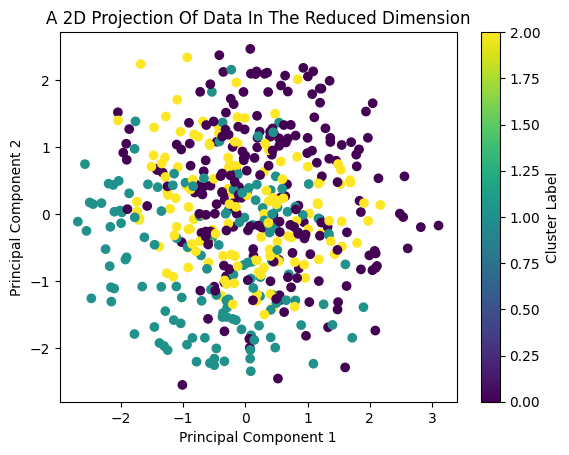

In [351]:
# A 2D Projection Of Data In The Reduced Dimension
x=PCA_df['col1']
y=PCA_df['col2']

# The 2D Projection
plt.scatter(x, y, c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('A 2D Projection Of Data In The Reduced Dimension')
plt.colorbar(label='Cluster Label')
plt.show()



<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #0F2027, #203A43, #2C5364); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(15, 32, 39, 0.3); display: block; max-width: 750px; border-left: 5px solid #2C5364; margin: 20px 0;">
    <p style="color: #E8F0F8; font-size: 16px; line-height: 1.8; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.1); letter-spacing: 0.4px;">
        <span style="display: block; font-size: 18px; color: #7FDBFF; margin-bottom: 15px; font-weight: bold; border-bottom: 2px solid rgba(127, 219, 255, 0.3); padding-bottom: 8px;">PCA Visualization Analysis</span>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                This scatter plot visualizes the results of dimensionality reduction using <span style="color: #98FF98; font-weight: bold;">Principal Component Analysis (PCA)</span>, showing a 2D projection of the data.
            </p>
        </div>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                <span style="color: #7FDBFF; font-weight: bold;">Key Components:</span>
                <ul style="color: #E8F0F8; margin: 10px 0 10px 20px; padding-left: 15px;">
                    <li style="margin: 8px 0; font-size: 16px;"><span style="color: #FFD700; font-weight: bold;">Axis:</span> The x-axis represents Principal Component 1, and the y-axis represents Principal Component 2. These are the two most important directions of variance in the original data.</li>
                    <li style="margin: 8px 0; font-size: 16px;"><span style="color: #FFD700; font-weight: bold;">Data Points:</span> Each dot represents a data point from the original dataset, projected onto these two principal components.</li>
                    <li style="margin: 8px 0; font-size: 16px;"><span style="color: #FFD700; font-weight: bold;">Color Encoding:</span> The viridis colormap is used to distinguish different clusters, with a colorbar for reference.</li>
                </ul>
            </p>
        </div>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                <span style="color: #7FDBFF; font-weight: bold;">Cluster Distribution:</span>
                <br>
                The plot reveals cluster distribution in the reduced 2D space, showing some separation between clusters but with overlap in the central region. This suggests that while <span style="color: #98FF98; font-weight: bold;">PCA</span> has captured cluster structure, the clusters aren't perfectly separable in this two-dimensional projection.
            </p>
        </div>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0;">
                <span style="color: #7FDBFF; font-weight: bold;">Overall Interpretation:</span>
                <br>
                The plot provides a visual representation of the data structure after dimensionality reduction. The observed overlap suggests that the original data likely exists in a higher-dimensional space where the clusters might be more distinct.
            </p>
        </div>
    </p>
</div>

<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #FF6F61, #6A5ACD, #FFD700); padding: 40px; border-radius: 20px; box-shadow: 0 12px 40px rgba(255, 105, 180, 0.6); display: inline-block; border: 4px solid rgba(255, 255, 255, 0.5); position: relative; overflow: hidden; animation: gradientShift 15s ease infinite;">
    <h1 style="color: white; text-align: center; font-size: 32px; letter-spacing: 5px; text-transform: uppercase; margin: 0; text-shadow: 4px 4px 8px rgba(0,0,0,0.5); white-space: nowrap;">
        Conclusion
    </h1>
</div>

<style>
@keyframes gradientShift {
    0% { background-position: 0% 50%; }
    50% { background-position: 100% 50%; }
    100% { background-position: 0% 50%; }
}
</style>

<div style="font-family: 'Arial', sans-serif; background: linear-gradient(135deg, #0F2027, #203A43, #2C5364); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(15, 32, 39, 0.3); display: block; max-width: 750px; border-left: 5px solid #2C5364; margin: 20px 0;">
    <p style="color: #E8F0F8; font-size: 16px; line-height: 1.8; margin: 0; text-shadow: 1px 1px 2px rgba(0,0,0,0.1); letter-spacing: 0.4px;">
        <span style="display: block; font-size: 18px; color: #7FDBFF; margin-bottom: 15px; font-weight: bold; border-bottom: 2px solid rgba(127, 219, 255, 0.3); padding-bottom: 8px;">Project Summary & Achievements</span>
        <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px; margin: 10px 0;">
            <p style="font-size: 16px; margin: 0; color: #FFD700;">
                This project investigated the application of <span style="color: #98FF98; font-weight: bold;">K-Means Clustering</span>, a prominent unsupervised learning method.
            </p>
        </div>
        <div style="background: rgba(255,255,255,0.05); padding: 20px; border-radius: 12px; margin: 15px 0; border: 1px solid rgba(127, 219, 255, 0.1);">
            <span style="display: block; color: #7FDBFF; font-weight: bold; margin-bottom: 15px;">Key Accomplishments:</span>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #98FF98;">✓</span> Employed the <span style="color: #98FF98; font-weight: bold;">Elbow Method</span> to determine the optimal number of clusters
                </p>
            </div>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #98FF98;">✓</span> Determined optimal cluster count: <span style="color: #FFD700; font-weight: bold;">k=3</span> for this dataset
                </p>
            </div>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #98FF98;">✓</span> Applied <span style="color: #98FF98; font-weight: bold;">Principal Component Analysis (PCA)</span> for dimensionality reduction
                </p>
            </div>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #98FF98;">✓</span> Utilized dimensionality reduction for enhanced data visualization
                </p>
            </div>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #98FF98;">✓</span> Created clear 2D visualization of cluster distribution
                </p>
            </div>
            <div style="background: rgba(255,255,255,0.05); padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 3px solid #FFD700;">
                <p style="font-size: 16px; margin: 0;">
                    <span style="color: #98FF98;">✓</span> Enabled qualitative assessment of clustering results and relationships
                </p>
            </div>
        </div>
    </p>
</div>
